### Neha Kale
### 2018130018, Roll no 11
### Batch A

# Experiment 1

---



**Objective**: To carry out linear regression (including multiple regression) and build a regression model using Python Platform

Case studies to consider: 
Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

Credit Score prediction – a Model to predict the probabilities of default. Use Linear Regression to predict the probabilities of default and assign credit to potential borrowers 



In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 25.9 MB 264 kB/s
     |████████████████████████████████| 10.9 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 41.5 MB/s 
     |████████████████████████████████| 102 kB 11.4 MB/s 
     |████████████████████████████████| 675 kB 34.5 MB/s 
     |████████████████████████████████| 4.7 MB 45.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 54.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=a038230bf0f0edc38780e0b555188db83b975f3512b46433f9a44f9a850e8328
  Stored in directory: /tmp/pip-ephem-wheel-cache-36ur4etd/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ee95e1fea56365be01ef20ee02d033de8077bb81a09625fcf801b728fa6fccff
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [ ]:
#importing libraries 
%matplotlib inline
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [ ]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
dataset=pd.read_csv('drive/MyDrive/Sem 8/DS/Exp 1/horse.csv')

Mounted at /content/drive


In [ ]:
df1=pd.DataFrame(dataset)
df=df1.copy()

In [ ]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [ ]:
df.isnull().sum().sort_values()

surgery                    0
lesion_2                   0
lesion_1                   0
surgical_lesion            0
outcome                    0
lesion_3                   0
cp_data                    0
age                        0
hospital_number            0
pulse                     24
packed_cell_volume        29
capillary_refill_time     32
total_protein             33
peristalsis               44
mucous_membrane           47
pain                      55
abdominal_distention      56
temp_of_extremities       56
respiratory_rate          58
rectal_temp               60
peripheral_pulse          69
rectal_exam_feces        102
nasogastric_tube         104
nasogastric_reflux       106
abdomen                  118
abdomo_appearance        165
abdomo_protein           198
nasogastric_reflux_ph    246
dtype: int64

In [ ]:
# Dropping columns having significant number of NaN values
df.drop('nasogastric_reflux_ph', axis=1, inplace = True)
df.drop('abdomo_protein', axis=1, inplace = True)
df.drop('abdomo_appearance', axis=1, inplace = True)
df.drop('abdomen', axis=1, inplace = True)
df.drop('nasogastric_reflux', axis=1, inplace = True)
df.drop('nasogastric_tube', axis=1, inplace = True)
df.drop('rectal_exam_feces', axis=1, inplace = True)

In [ ]:
df.isnull().sum().sort_values()

surgery                   0
lesion_2                  0
lesion_1                  0
surgical_lesion           0
outcome                   0
lesion_3                  0
cp_data                   0
hospital_number           0
age                       0
pulse                    24
packed_cell_volume       29
capillary_refill_time    32
total_protein            33
peristalsis              44
mucous_membrane          47
pain                     55
abdominal_distention     56
temp_of_extremities      56
respiratory_rate         58
rectal_temp              60
peripheral_pulse         69
dtype: int64

In [ ]:
df['peripheral_pulse'] = df['peripheral_pulse'].astype('category').cat.codes
df['mucous_membrane'] = df['mucous_membrane'].astype('category').cat.codes
df['capillary_refill_time'] = df['capillary_refill_time'].astype('category').cat.codes
df['peristalsis'] = df['peristalsis'].astype('category').cat.codes
df['abdominal_distention'] = df['abdominal_distention'].astype('category').cat.codes
df['surgical_lesion'] = df['surgical_lesion'].astype('category').cat.codes

df['cp_data'] = df['cp_data'].astype('category').cat.codes


In [ ]:
print(df['lesion_1'].value_counts())

0        56
3111     32
3205     29
2208     20
2205     13
         ..
5205      1
2305      1
5000      1
7400      1
11300     1
Name: lesion_1, Length: 61, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       299 non-null    int8   
 8   mucous_membrane        299 non-null    int8   
 9   capillary_refill_time  299 non-null    int8   
 10  pain                   244 non-null    object 
 11  peristalsis            299 non-null    int8   
 12  abdominal_distention   299 non-null    int8   
 13  packed_cell_volume     270 non-null    float64
 14  total_protein          266 non-null    float64
 15  outcom

In [ ]:
df['surgery'].value_counts()

yes    180
no     119
Name: surgery, dtype: int64

In [ ]:
df['surgery'] = df['surgery'].astype('category').cat.codes
df['age'] = df['age'].astype('category').cat.codes
df['temp_of_extremities'] = df['temp_of_extremities'].astype('category').cat.codes
df['peripheral_pulse'] = df['peripheral_pulse'].astype('category').cat.codes
df['pain'] = df['pain'].astype('category').cat.codes
df['outcome'] = df['outcome'].astype('category').cat.codes


In [ ]:
df.isnull().sum().sort_values()

surgery                   0
lesion_2                  0
lesion_1                  0
surgical_lesion           0
outcome                   0
abdominal_distention      0
peristalsis               0
lesion_3                  0
capillary_refill_time     0
pain                      0
peripheral_pulse          0
temp_of_extremities       0
hospital_number           0
age                       0
mucous_membrane           0
cp_data                   0
pulse                    24
packed_cell_volume       29
total_protein            33
respiratory_rate         58
rectal_temp              60
dtype: int64

In [ ]:
df = df.dropna(subset=['rectal_temp'])
df = df.dropna(subset=['pulse'])
df = df.dropna(subset=['packed_cell_volume'])
df = df.dropna(subset=['total_protein'])
df = df.dropna(subset=['respiratory_rate'])
print(df.isnull().sum())
df.shape

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


(190, 21)

In [ ]:
# sb.pairplot(df, hue='outcome')
# df.info()

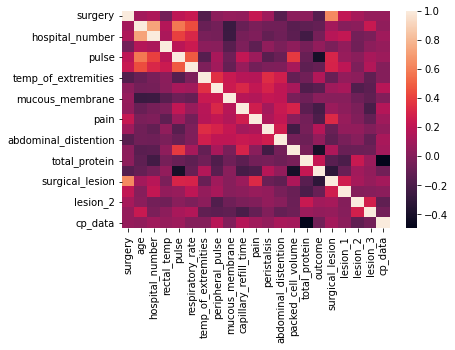

In [ ]:
# plotting the heatmap

corr= df.corr()
sb.heatmap(corr)
  
# displaying the plotted heatmap
plt.show()

In [ ]:
# Split df into X and y
y = df['outcome'].copy()
X = df.drop('outcome', axis=1).copy()

# Scale X with a standard scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Accuracy of Logistic Regression : {:.2f}%".format(lr.score(X_test, y_test) * 100))
y_pred = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Accuracy of Logistic Regression : 76.32%


array([[ 2,  2,  4],
       [ 1,  3,  1],
       [ 0,  1, 24]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7631578947368421

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

In [ ]:
logreg_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [ ]:
print("Accuracy of Logistic Regression with Hyperparameter Tuning: {:.2f}%".format(logreg_cv.score(X_test, y_test)* 100))

Accuracy of Logistic Regression with Hyperparameter Tuning: 71.05%


# Part 2
Predict a car's fuel economy from its physical parameters such as weight and engine size and power 

In [ ]:
dataset2=pd.read_csv('drive/MyDrive/Sem 8/DS/Exp 1/auto-mpg.csv')
df3=pd.DataFrame(dataset2)
df2=df3.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df2.isnull().sum().sort_values()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df2['horsepower'].value_counts()
df2['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df2 = df2[df2.horsepower != '?']
df2['horsepower'] = df2['horsepower'].astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.shape


(392, 9)

In [ ]:
df2['horsepower'].dtypes

dtype('int64')

In [ ]:
df2['car name'].value_counts()
# len(df2['car name'].unique())

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

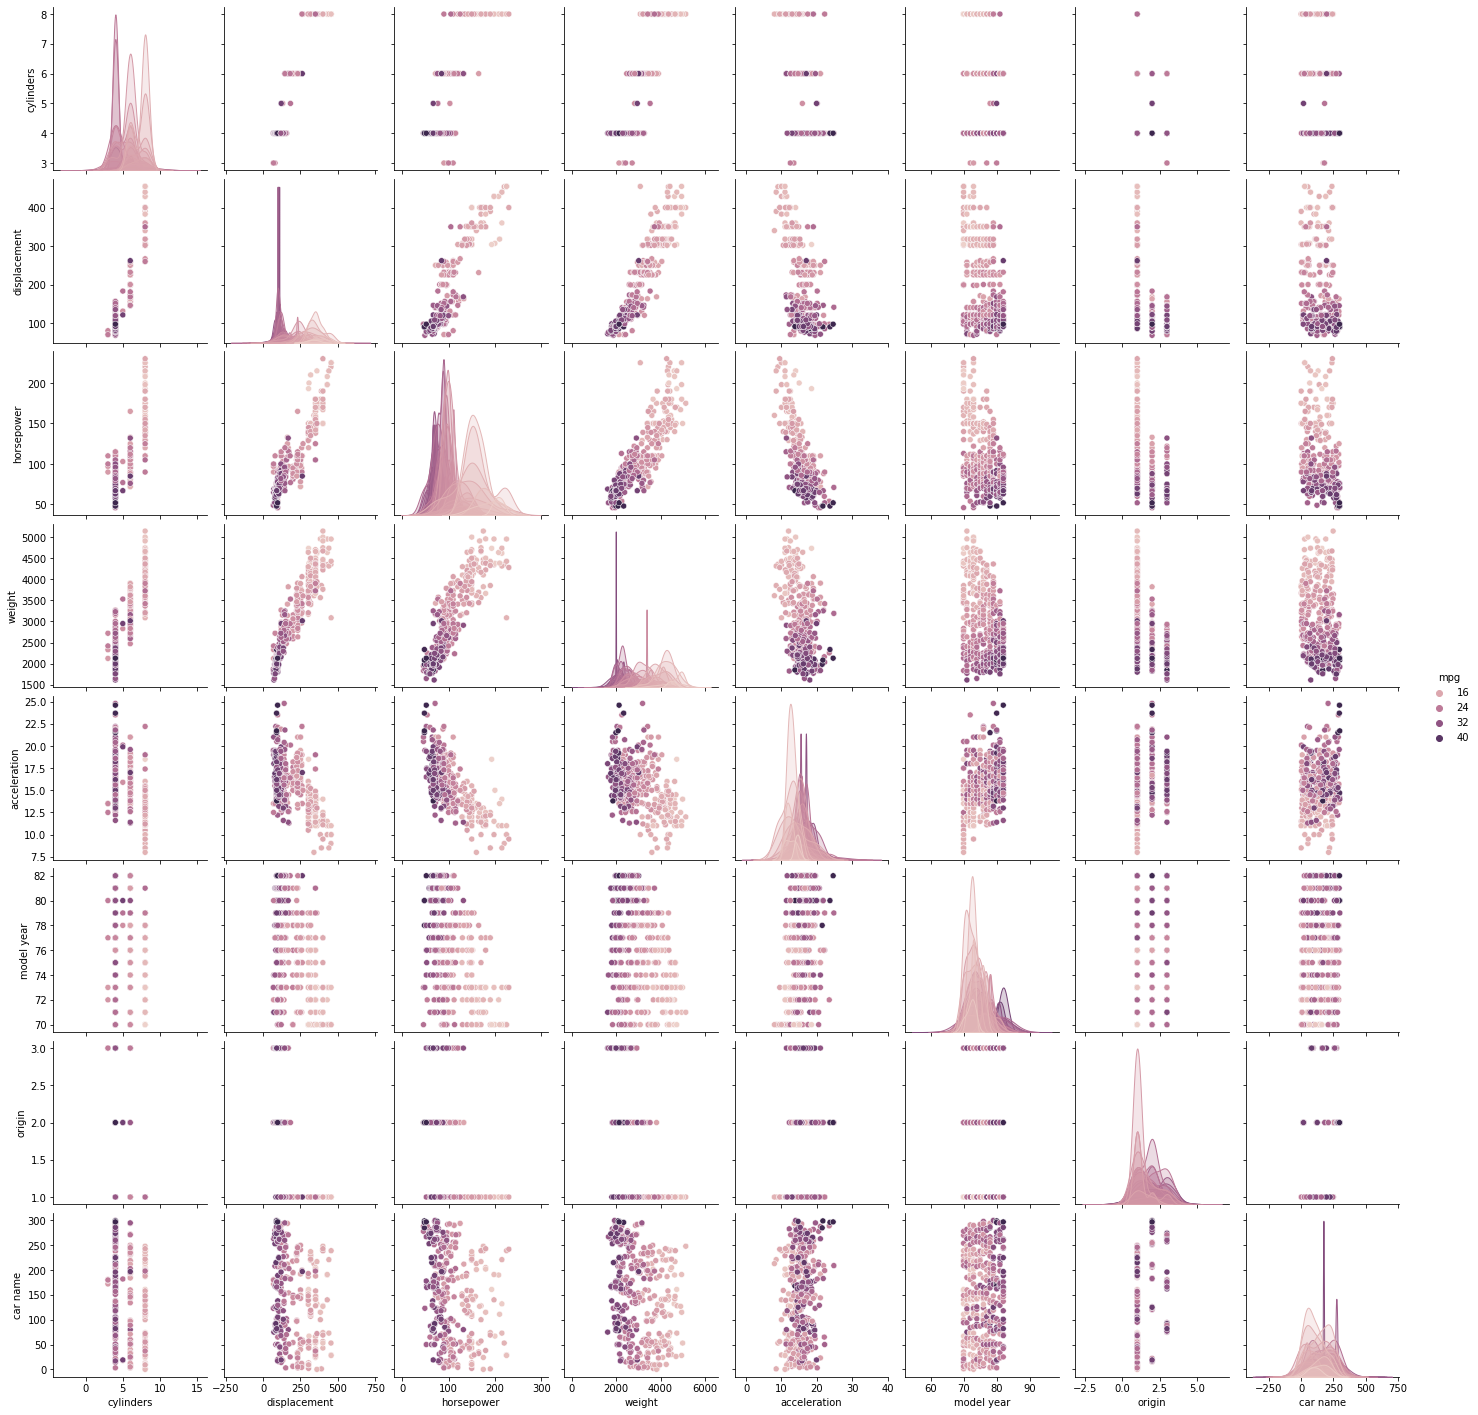

In [ ]:
sb.pairplot(df2, hue='mpg')

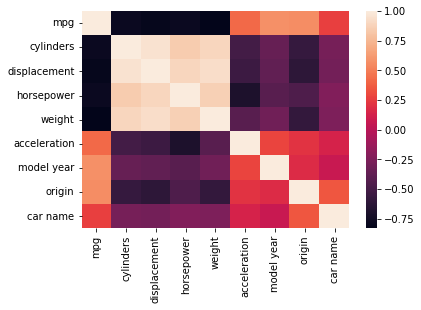

In [ ]:
# plotting the heatmap

corr= df2.corr()
sb.heatmap(corr)
  
# displaying the plotted heatmap
plt.show()

In [ ]:
df2['car name'] = df2['car name'].astype('category').cat.codes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


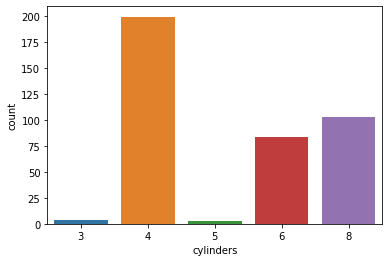

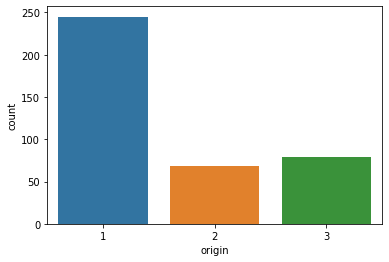

In [ ]:
plt.figure()
sb.countplot(df2["cylinders"])

plt.figure()
sb.countplot(df2["origin"])

In [ ]:
X = df2.drop(["mpg"], axis = 1)
y = df2.mpg

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,48
1,8,350.0,165,3693,11.5,70,1,35
2,8,318.0,150,3436,11.0,70,1,229
3,8,304.0,150,3433,12.0,70,1,13
4,8,302.0,140,3449,10.5,70,1,159
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,151
394,4,97.0,52,2130,24.6,82,2,297
395,4,135.0,84,2295,11.6,82,1,118
396,4,120.0,79,2625,18.6,82,1,157


In [ ]:
# Standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
lr_score=regressor.score(X_test, y_test)
print("The accuracy  is: " ,lr_score)

The accuracy  is:  0.7855315908366013


# Conclusion: 


1.   I understood logistic and linear regression and successfully implemented it.
2. I learned to deal with null values and categorical features. 
3.   I learned that linear regression has no hyperparameters hence it cannot be tuned. 

